/var/folders/tk/57r3fhb13vs_58bv5_ry07_r0000gn/T/ipykernel_3909/871759358.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_financial_summary = financial_journal.groupby([financial_journal['timestamp'].dt.to_period('M'), 'category'])['amount'].sum().unstack(fill_value=0).reset_index()


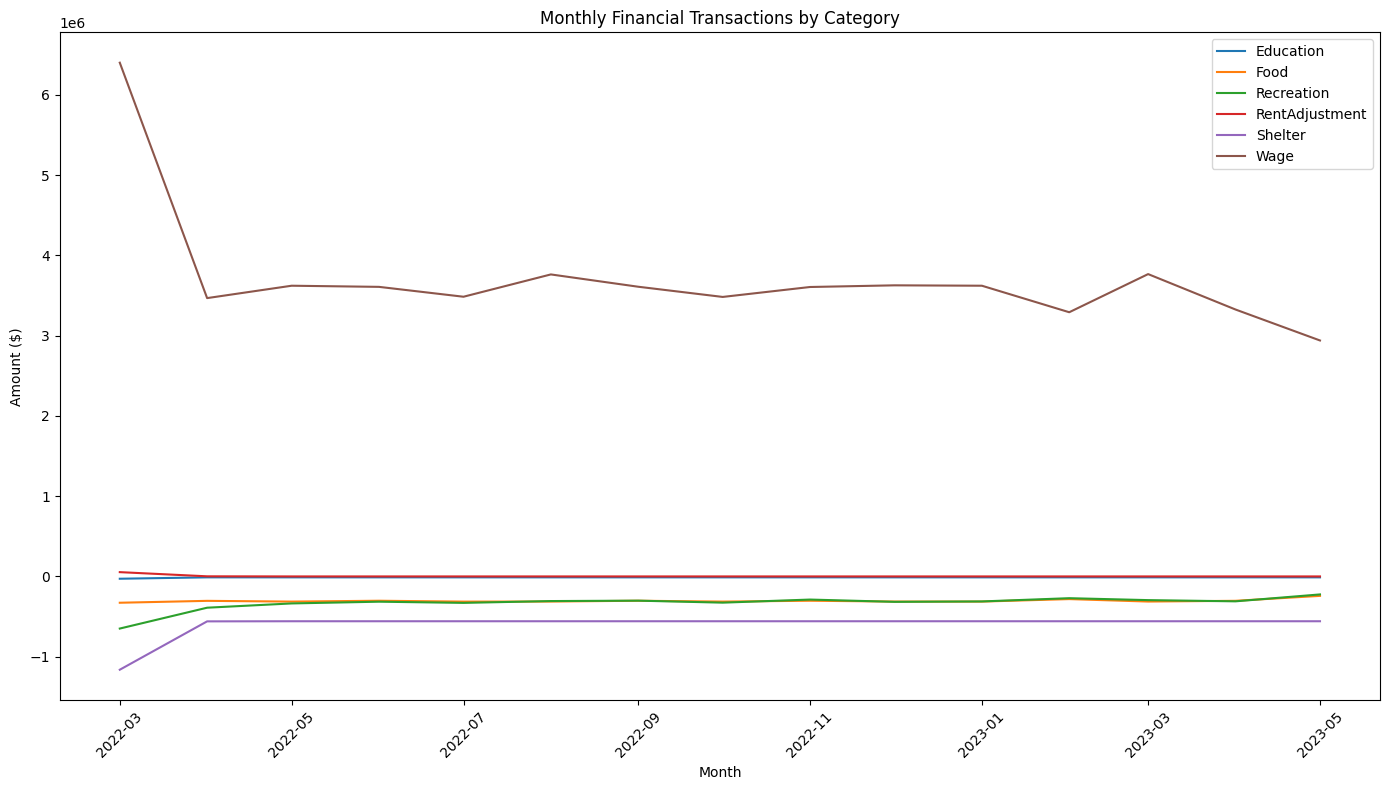

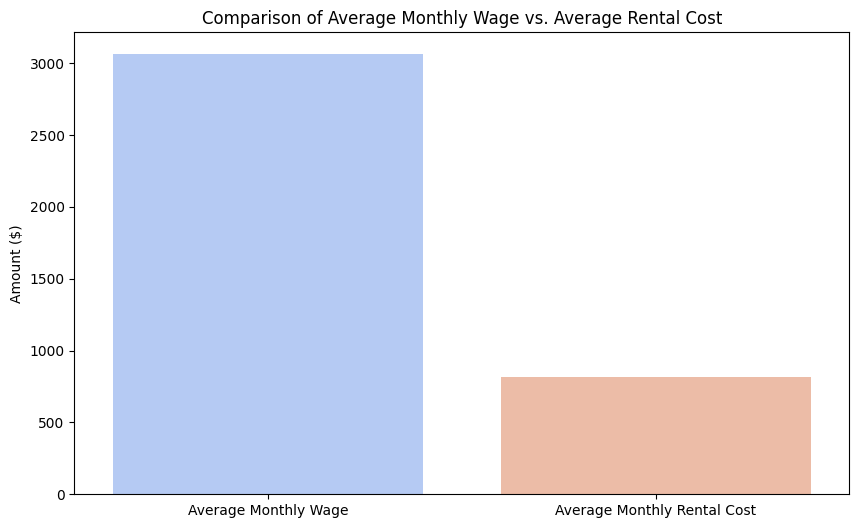

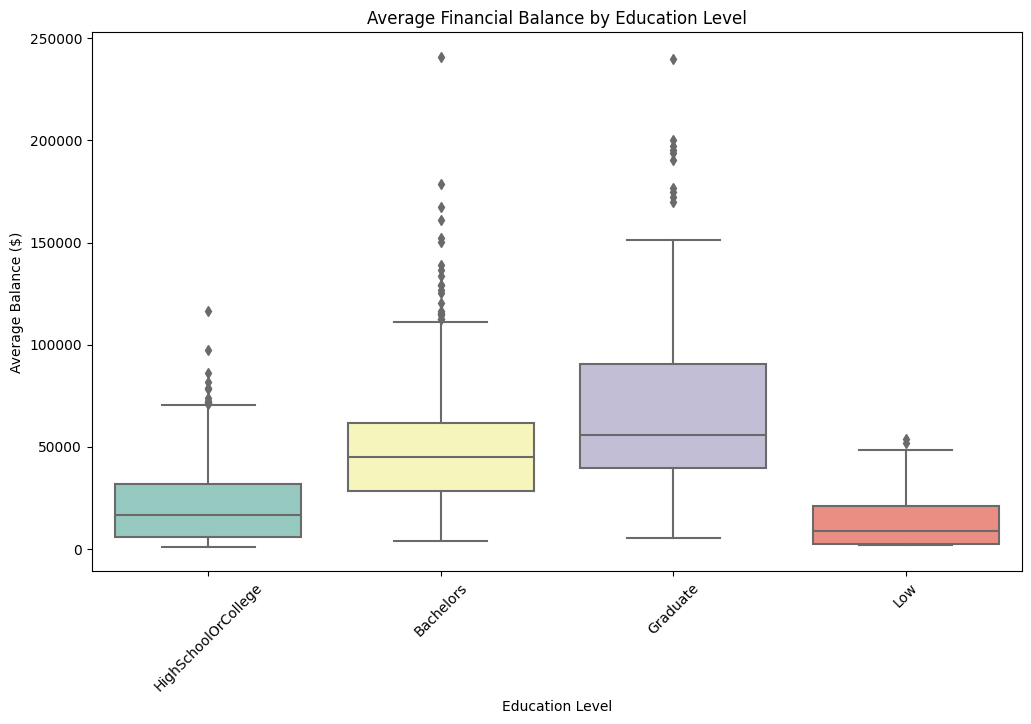

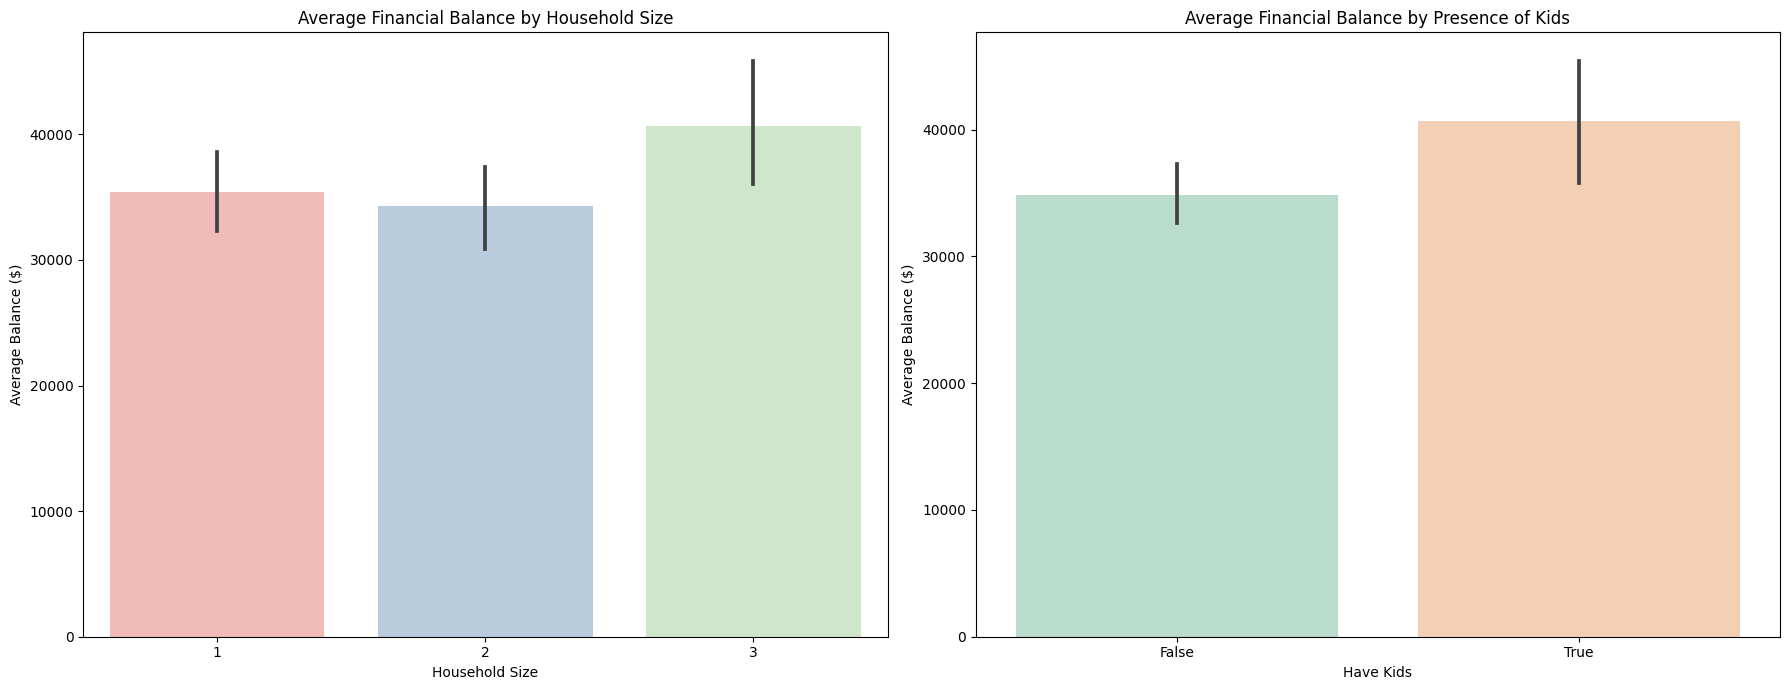

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Load datasets
financial_journal = pd.read_csv('Journals/FinancialJournal.csv')
jobs = pd.read_csv('Attributes/Jobs.csv')
apartments = pd.read_csv('Attributes/Apartments.csv')
participants = pd.read_csv('Attributes/Participants.csv')

# Convert 'timestamp' in financial_journal from string to datetime
financial_journal['timestamp'] = pd.to_datetime(financial_journal['timestamp'])

# Monthly financial summary
monthly_financial_summary = financial_journal.groupby([financial_journal['timestamp'].dt.to_period('M'), 'category'])['amount'].sum().unstack(fill_value=0).reset_index()
monthly_financial_summary['timestamp'] = monthly_financial_summary['timestamp'].dt.to_timestamp()

# Plotting monthly financial transactions by category
plt.figure(figsize=(14, 8))
for category in monthly_financial_summary.columns[1:]:
    plt.plot(monthly_financial_summary['timestamp'], monthly_financial_summary[category], label=category)
plt.title('Monthly Financial Transactions by Category')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average hourly rate and rental cost
average_hourly_rate = jobs['hourlyRate'].mean()
average_rental_cost = apartments['rentalCost'].mean()
average_monthly_wage = average_hourly_rate * 40 * 4  # 40 hours/week, 4 weeks/month

# Comparison of average monthly wage and rental cost
categories = ['Average Monthly Wage', 'Average Monthly Rental Cost']
values = [average_monthly_wage, average_rental_cost]
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=values, palette='coolwarm')
plt.title('Comparison of Average Monthly Wage vs. Average Rental Cost')
plt.ylabel('Amount ($)')
plt.show()

# Merge financial data with participants for demographic analysis
average_balance_per_participant = financial_journal.groupby('participantId')['amount'].sum().reset_index(name='averageBalance')
participants_financial = pd.merge(participants, average_balance_per_participant, on='participantId')

# Average financial balance by education level
plt.figure(figsize=(12, 7))
sns.boxplot(x='educationLevel', y='averageBalance', data=participants_financial, palette='Set3')
plt.title('Average Financial Balance by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Balance ($)')
plt.xticks(rotation=45)
plt.show()

# Average financial balance by household size and presence of kids
fig, axs = plt.subplots(1, 2, figsize=(18, 7))
sns.barplot(x='householdSize', y='averageBalance', data=participants_financial, ax=axs[0], palette='Pastel1')
axs[0].set_title('Average Financial Balance by Household Size')
axs[0].set_xlabel('Household Size')
axs[0].set_ylabel('Average Balance ($)')

sns.barplot(x='haveKids', y='averageBalance', data=participants_financial, ax=axs[1], palette='Pastel2')
axs[1].set_title('Average Financial Balance by Presence of Kids')
axs[1].set_xlabel('Have Kids')
axs[1].set_ylabel('Average Balance ($)')
plt.tight_layout()
plt.show()


/var/folders/tk/57r3fhb13vs_58bv5_ry07_r0000gn/T/ipykernel_3909/2128379258.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_financial_summary = financial_journal.groupby([financial_journal['timestamp'].dt.to_period('M'), 'category'])['amount'].sum().unstack(fill_value=0).reset_index()


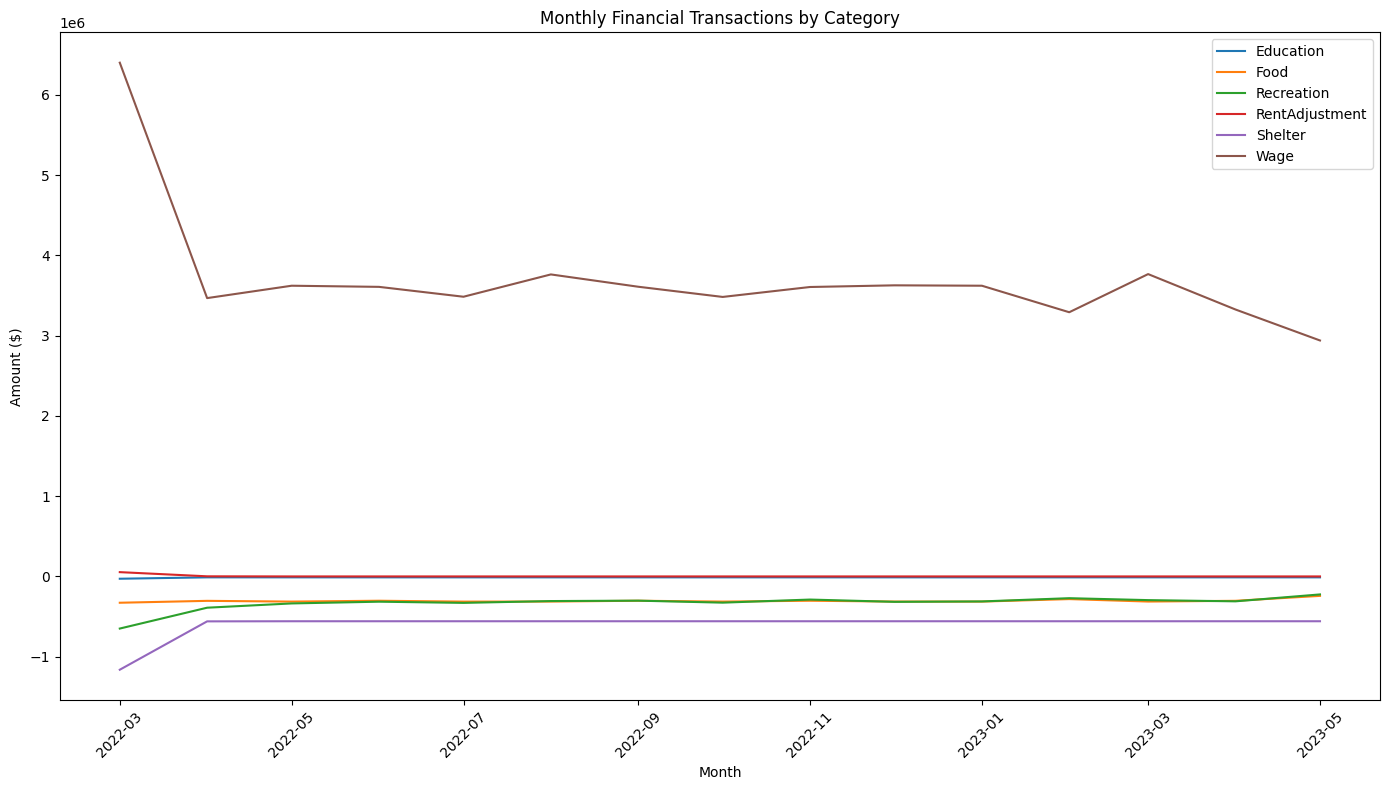

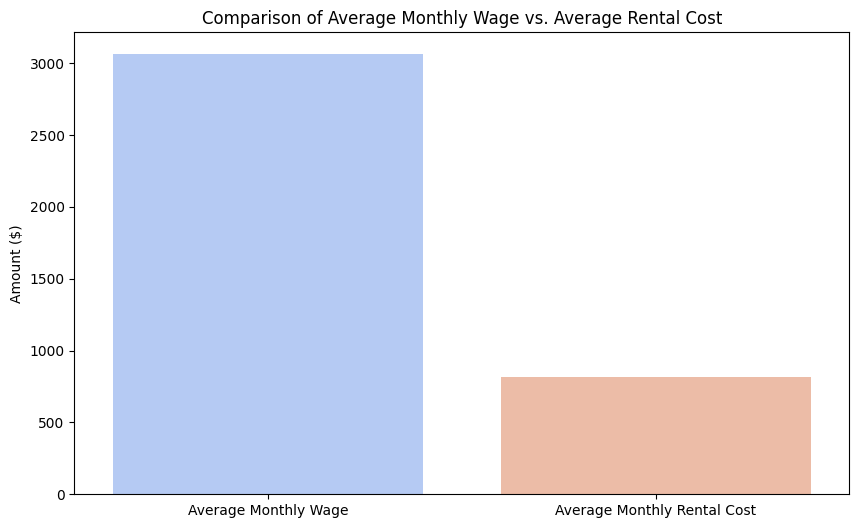

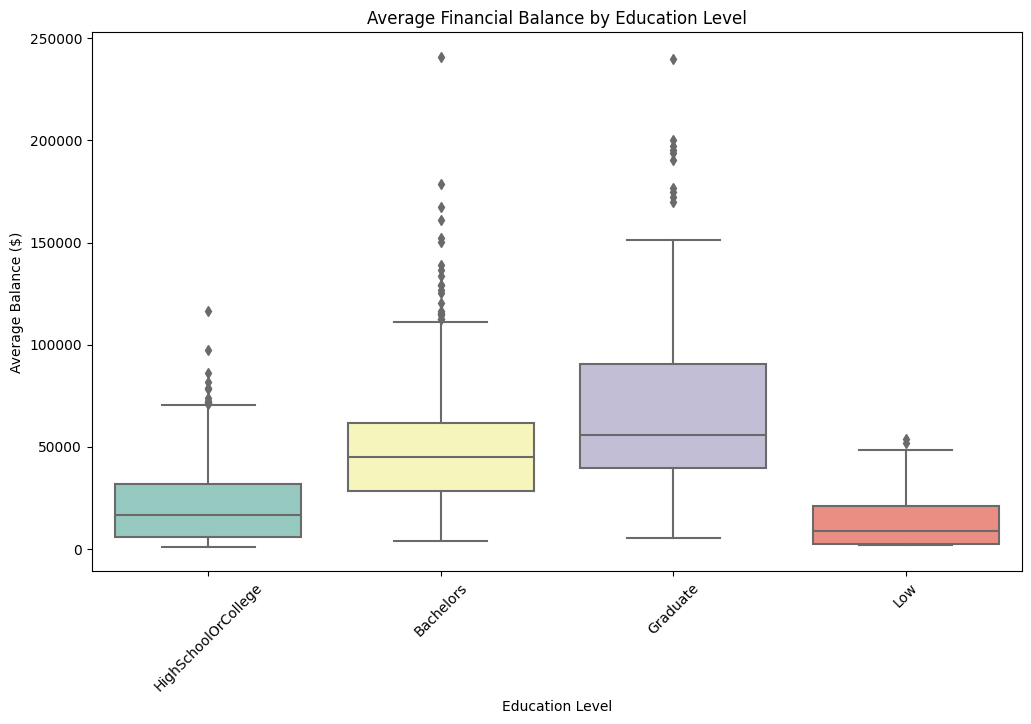

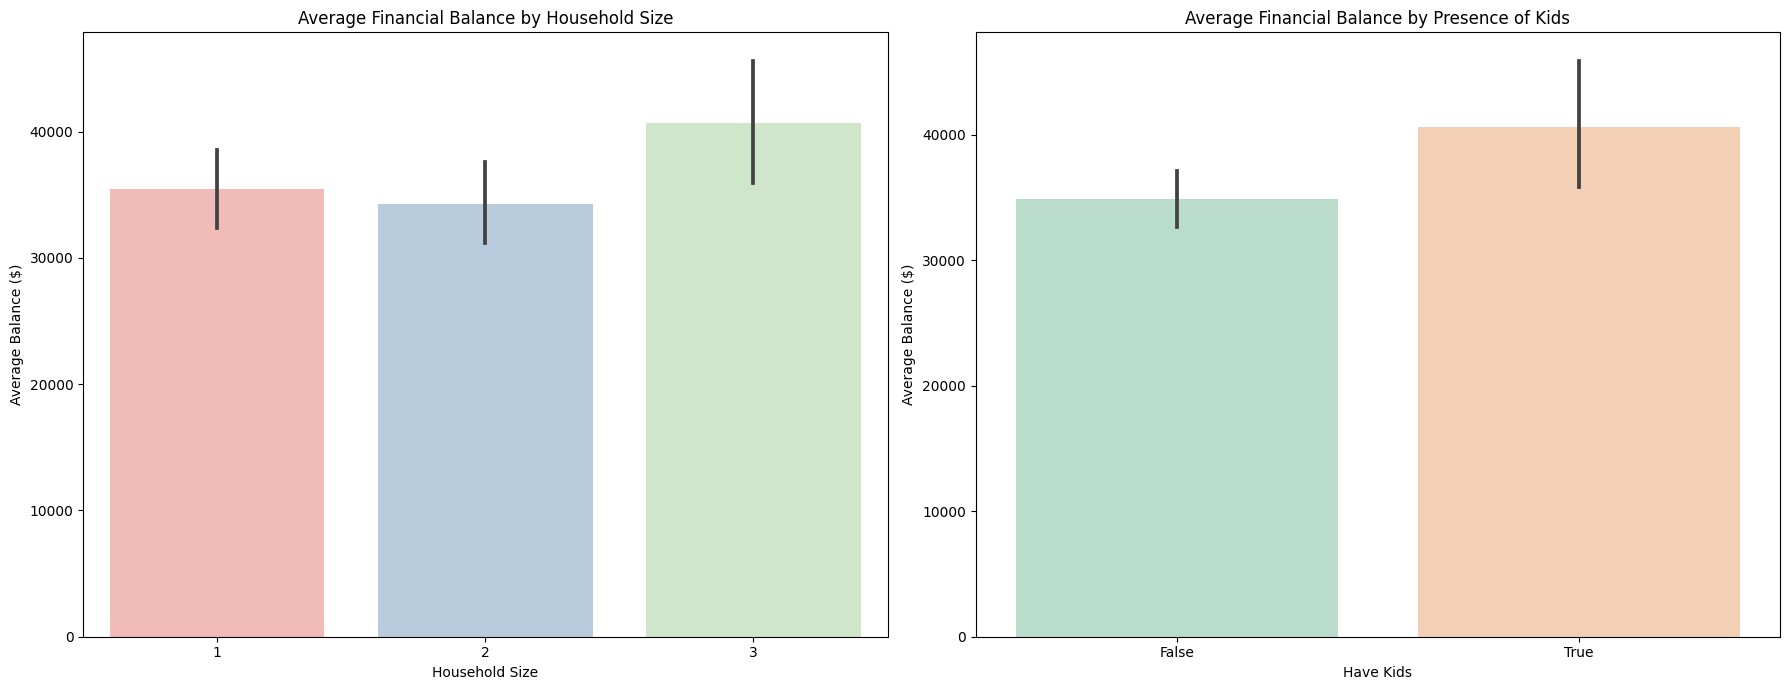

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Load datasets
financial_journal = pd.read_csv('Journals/FinancialJournal.csv')
jobs = pd.read_csv('Attributes/Jobs.csv')
apartments = pd.read_csv('Attributes/Apartments.csv')
participants = pd.read_csv('Attributes/Participants.csv')


# Convert 'timestamp' in financial_journal from string to datetime for plotting
financial_journal['timestamp'] = pd.to_datetime(financial_journal['timestamp'])

# 1. Monthly financial summary visualization
monthly_financial_summary = financial_journal.groupby([financial_journal['timestamp'].dt.to_period('M'), 'category'])['amount'].sum().unstack(fill_value=0).reset_index()
monthly_financial_summary['timestamp'] = monthly_financial_summary['timestamp'].dt.to_timestamp()

plt.figure(figsize=(14, 8))
for category in monthly_financial_summary.columns[1:]:  # Skipping 'timestamp' column
    plt.plot(monthly_financial_summary['timestamp'], monthly_financial_summary[category], label=category)

plt.title('Monthly Financial Transactions by Category')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Comparison of average monthly wage vs. average rental cost
average_hourly_rate = jobs['hourlyRate'].mean()
average_rental_cost = apartments['rentalCost'].mean()
average_monthly_wage = average_hourly_rate * 40 * 4  # Assuming 40 hours/week and 4 weeks/month

categories = ['Average Monthly Wage', 'Average Monthly Rental Cost']
values = [average_monthly_wage, average_rental_cost]

plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=values, palette='coolwarm')
plt.title('Comparison of Average Monthly Wage vs. Average Rental Cost')
plt.ylabel('Amount ($)')
plt.show()

# 3. Average financial balance by education level
# Calculating average balance per participant
average_balance_per_participant = financial_journal.groupby('participantId')['amount'].sum().reset_index(name='averageBalance')
# Merging this with participants for demographic data
participants_financial = pd.merge(participants, average_balance_per_participant, on='participantId')

plt.figure(figsize=(12, 7))
sns.boxplot(x='educationLevel', y='averageBalance', data=participants_financial, palette='Set3')
plt.title('Average Financial Balance by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Balance ($)')
plt.xticks(rotation=45)
plt.show()

# 4. Average financial balance by household size and presence of kids
fig, axs = plt.subplots(1, 2, figsize=(18, 7))
sns.barplot(x='householdSize', y='averageBalance', data=participants_financial, ax=axs[0], palette='Pastel1')
axs[0].set_title('Average Financial Balance by Household Size')
axs[0].set_xlabel('Household Size')
axs[0].set_ylabel('Average Balance ($)')

sns.barplot(x='haveKids', y='averageBalance', data=participants_financial, ax=axs[1], palette='Pastel2')
axs[1].set_title('Average Financial Balance by Presence of Kids')
axs[1].set_xlabel('Have Kids')
axs[1].set_ylabel('Average Balance ($)')
plt.tight_layout()
plt.show()
